In [1]:
# Importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("Crop_recommendationV2.csv")

In [3]:
# preview the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671


In [4]:
# Info & Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [5]:
# Soil Type: Type of soil (1 = Sandy, 2 = Loamy, 3 = Clay).
# Water Source Type: Type of water source used for irrigation (1 = River, 2 = Groundwater, 3 = Recycled)

In [6]:
# Summary statistics
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,soil_type,sunlight_exposure,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,...,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,20.151388,1.991364,8.570609,...,5.465652,3.515000,12.344959,49.850701,125.846403,1.999545,24.801013,2.003636,50.304701,2.990268
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,5.793720,0.812263,1.999382,...,2.605294,1.697912,4.297494,28.886354,43.564527,0.818999,14.523975,0.812021,28.580352,1.139637
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,10.024260,1.000000,5.000710,...,1.003338,1.000000,5.004341,0.038103,50.209990,1.000000,0.017756,1.000000,0.054911,1.002106
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,15.179949,1.000000,6.904620,...,3.203903,2.000000,8.585734,24.379866,88.030737,1.000000,12.212594,1.000000,26.104674,2.051814
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,20.088481,2.000000,8.609968,...,5.418049,4.000000,12.303616,49.982421,126.441536,2.000000,24.922548,2.000000,50.171934,2.968675
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,25.255146,3.000000,10.220394,...,7.686417,5.000000,15.975567,74.681904,163.850536,3.000000,37.322761,3.000000,75.262676,3.968736
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,29.997860,3.000000,11.991041,...,9.999990,6.000000,19.988474,99.983849,199.982166,3.000000,49.992046,3.000000,99.957274,4.997130


In [7]:
# Checking missing values
missing_values = df.isnull().sum().sum()
print(f"Total Missing values: {missing_values}")

Total Missing values: 0


In [8]:
# Checking duplicate records
duplicates_records = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates_records}")

Total duplicate rows: 0


In [9]:
# Encoding categorical target class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

In [10]:
# previewing dataset after encoding
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency,encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671,20


In [11]:
# Preparing for high importance features selection
X =df.drop(['label', 'encoded_label'], axis=1)    # independent feature
y = df['encoded_label']        # target class

###  Selecting Features
 by Feature Importance from Tree-Based Models

In [12]:
# METHOD:1
# from sklearn.feature_selection import SelectKBest, f_classify
# selector = SelectKBest(score_func=f_classif,k=10) # keep top 15
# X_new = selector.fit_transform(X, y)

# # Get selected feature names
# selected_features = X.columns[selector.get_support()]
# print("Selected Features:", selected_features.tolist())


In [13]:
# METHOD: 2
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Train a basic random forest (no tuning)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

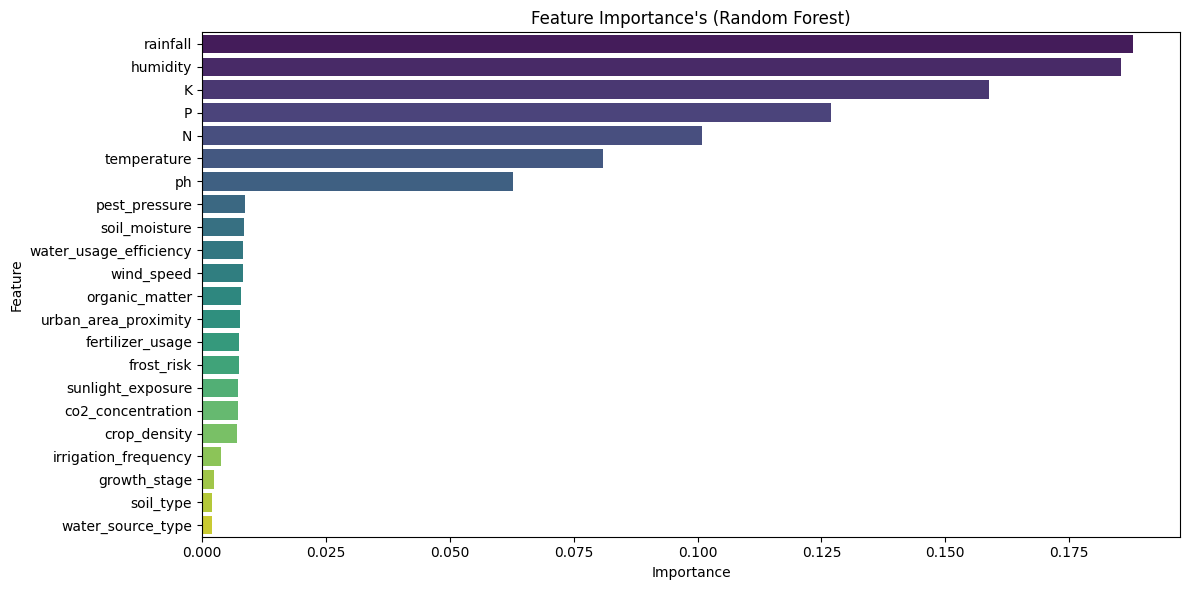

In [15]:
# Get feature importance's
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette='viridis',
    hue='Feature',     # Add this line
    legend=False       # Optional: Remove legend if not needed
)
plt.title("Feature Importance's (Random Forest)")
plt.tight_layout()
plt.show()


##  Drop Low Importance Features

In [16]:
#  Drop Low Importance Features (feature's importance < threshold) to reduce the chances of overfitting
threshold =0.025
low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()
print(f"Features to drop (< {threshold} importance):\n", low_importance_features)

Features to drop (< 0.025 importance):
 ['pest_pressure', 'soil_moisture', 'water_usage_efficiency', 'wind_speed', 'organic_matter', 'urban_area_proximity', 'fertilizer_usage', 'frost_risk', 'sunlight_exposure', 'co2_concentration', 'crop_density', 'irrigation_frequency', 'growth_stage', 'soil_type', 'water_source_type']


In [17]:
df.drop(columns=low_importance_features, inplace=True)

In [18]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


### Extracting Dependent and Independent features

In [19]:
# Extracting Dependent and Independent features
X =df.drop(['label', 'encoded_label'], axis=1)    # independent feature
y = df['encoded_label']          # target class

In [20]:
print("Features used for training:")
display(X.head())
print("Target shape:", y.shape)


Features used for training:


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


Target shape: (2200,)


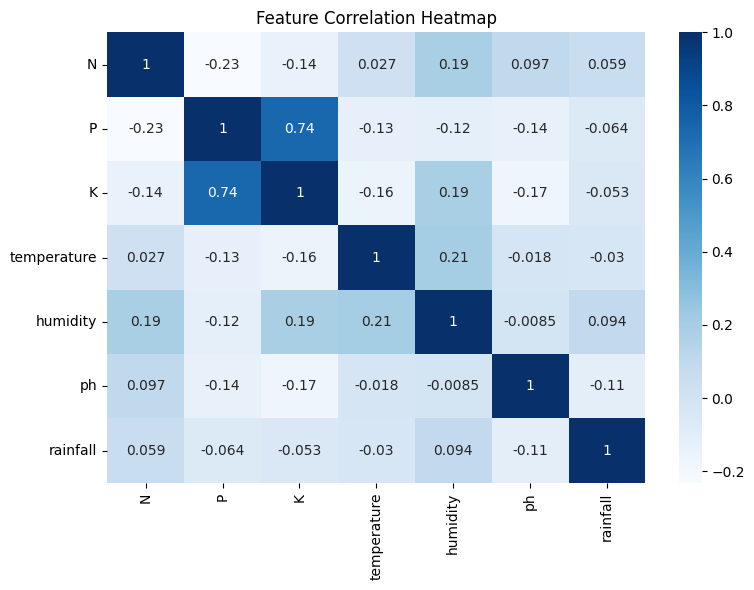

In [21]:
# Visualize feature correlations
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### Split dataset into train and test

In [22]:
# Split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


### Scaling Features

In [23]:
# Standard scaling of numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Comparison of Multiple Classifiers for Crop Type Prediction
In this section, we train and evaluate various classification algorithms -  **Logistic Regression**, **Decision Tree**, **Support Vector Machine(SVM)**, **K-Nearest Neighbors(KNN)** and **Random Forest** to compare their performance and accuracy. For each classifier, a grid search is performed to find the set of hyperparameters that maximizes cross-validated accuracy.

In [24]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.1, 1, 5, 10, 20, 50, 100],
    'max_iter': [200, 300, 500]
}

# Grid search with accuracy as the evaluation metric
lr_clf = GridSearchCV(
    LogisticRegression(solver='lbfgs'),  # Removed multi_class param
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [25]:
# Fit the model
lr_clf.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 20, 50, 100],
                         'max_iter': [200, 300, 500], 'penalty': ['l2']},
             scoring='accuracy', verbose=2)

In [26]:
# Output best found hyperparameters and cross-validated accuracy
print("Logistic Regression best params:", lr_clf.best_params_)
print("Logistic Regression best CV score:", lr_clf.best_score_)

Logistic Regression best params: {'C': 50, 'max_iter': 200, 'penalty': 'l2'}
Logistic Regression best CV score: 0.9823863636363637


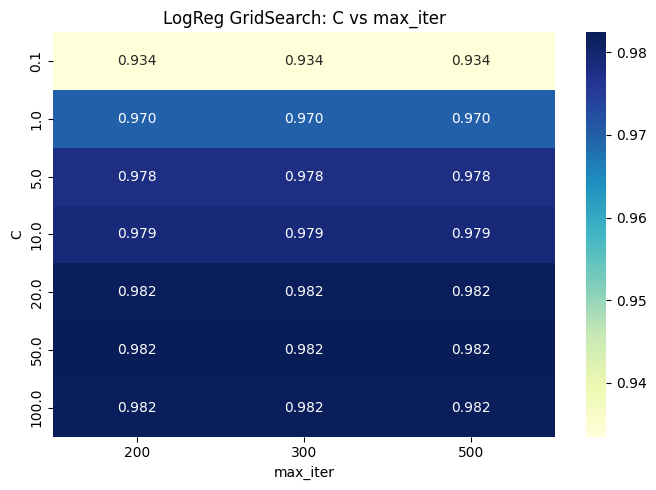

In [27]:

# Visualize cross-validated scores as a heatmap
results_lr = pd.DataFrame(lr_clf.cv_results_)
pivot_lr = results_lr.pivot_table(values='mean_test_score', index='param_C', columns='param_max_iter')
plt.figure(figsize=(7,5))
sns.heatmap(pivot_lr, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('LogReg GridSearch: C vs max_iter')
plt.ylabel("C")
plt.xlabel("max_iter")
plt.tight_layout()
plt.show()


In [28]:
# Evaluate model on test data
y_pred_lr = lr_clf.predict(X_test)

In [29]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy (Logistic Regression):", acc_lr)

Test Accuracy (Logistic Regression): 0.9704545454545455


In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   

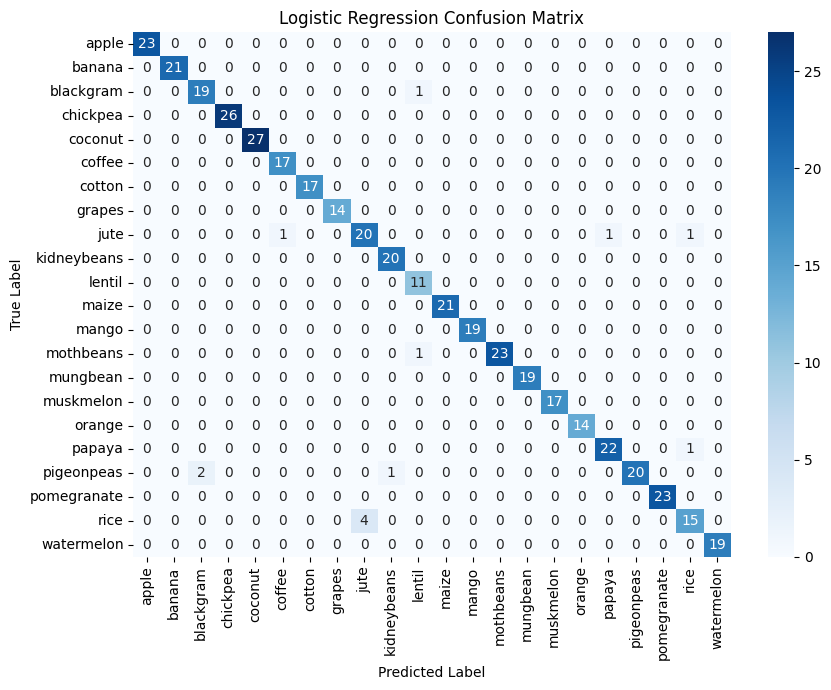

In [31]:
# Confusion Matrix Visualization
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [32]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid for the Decision Tree classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 4, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for Decision Tree
dt_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [33]:

dt_clf.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 10]},
             scoring='accuracy', verbose=2)

In [34]:
print("Decision Tree best params:", dt_clf.best_params_)
print("Decision Tree best CV score:", dt_clf.best_score_)


Decision Tree best params: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}
Decision Tree best CV score: 0.9869318181818182


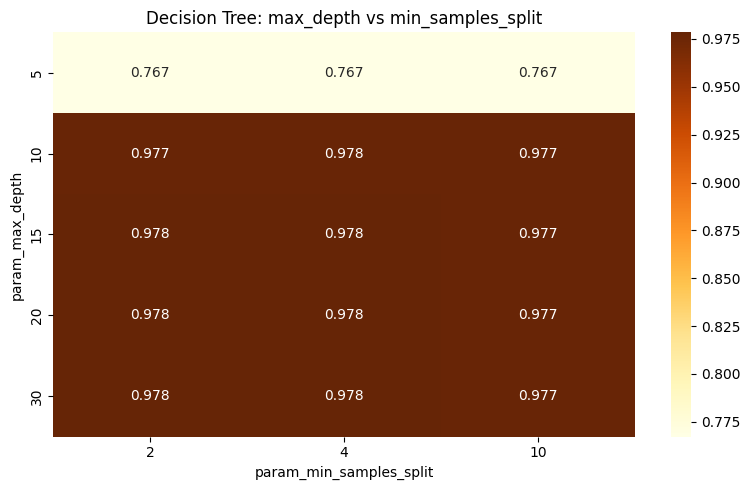

In [35]:
# Heatmap of mean test scores for different max_depth and min_samples_split
results_dt = pd.DataFrame(dt_clf.cv_results_)
pivot_dt = results_dt.pivot_table(values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')
plt.figure(figsize=(8,5))
sns.heatmap(pivot_dt, annot=True, fmt=".3f", cmap='YlOrBr')
plt.title('Decision Tree: max_depth vs min_samples_split')
plt.tight_layout()
plt.show()


In [36]:
# Evaluate on test data
y_pred_dt = dt_clf.predict(X_test)

In [37]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy (Decision Tree):", acc_dt)

Test Accuracy (Decision Tree): 0.9863636363636363


In [38]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   

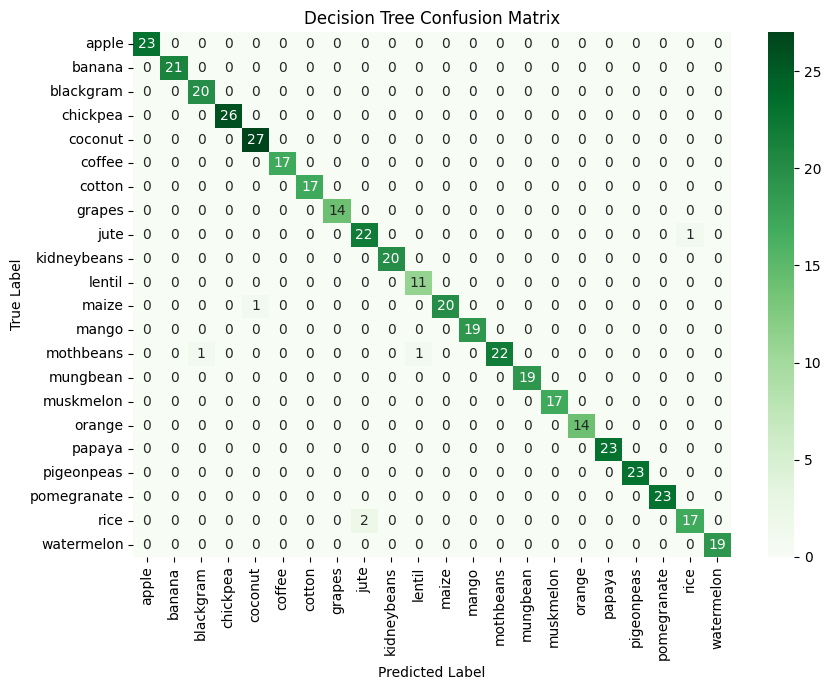

In [39]:
# Confusion Matrix Visualization
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [40]:
# Support Vector Machine (SVM) Classifier
from sklearn.svm import SVC

# Define the hyperparameter grid for the SVM classifier
param_grid_svc = {
    'C': [0.1, 1, 10, 20, 50],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

svc_clf = GridSearchCV(
    SVC(),
    param_grid_svc,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [41]:
svc_clf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 50], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=2)

In [42]:
print("SVM best params:", svc_clf.best_params_)
print("SVM best CV score:", svc_clf.best_score_)


SVM best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM best CV score: 0.989207768623552


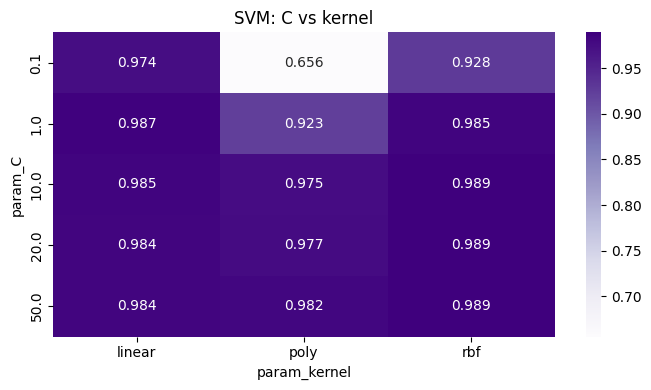

In [43]:
# Heatmap for SVM cross-validation results
results_svc = pd.DataFrame(svc_clf.cv_results_)
pivot_svc = results_svc.pivot_table(values='mean_test_score', index='param_C', columns='param_kernel')
plt.figure(figsize=(7,4))
sns.heatmap(pivot_svc, annot=True, fmt=".3f", cmap='Purples')
plt.title('SVM: C vs kernel')
plt.tight_layout()
plt.show()


In [44]:
# Evaluate on test data
y_pred_svc = svc_clf.predict(X_test)

In [45]:
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Test Accuracy (SVM):", acc_svc)

Test Accuracy (SVM): 0.9795454545454545


In [46]:
print("Classification Report:\n", classification_report(y_test, y_pred_svc, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      1.00      0.92        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   

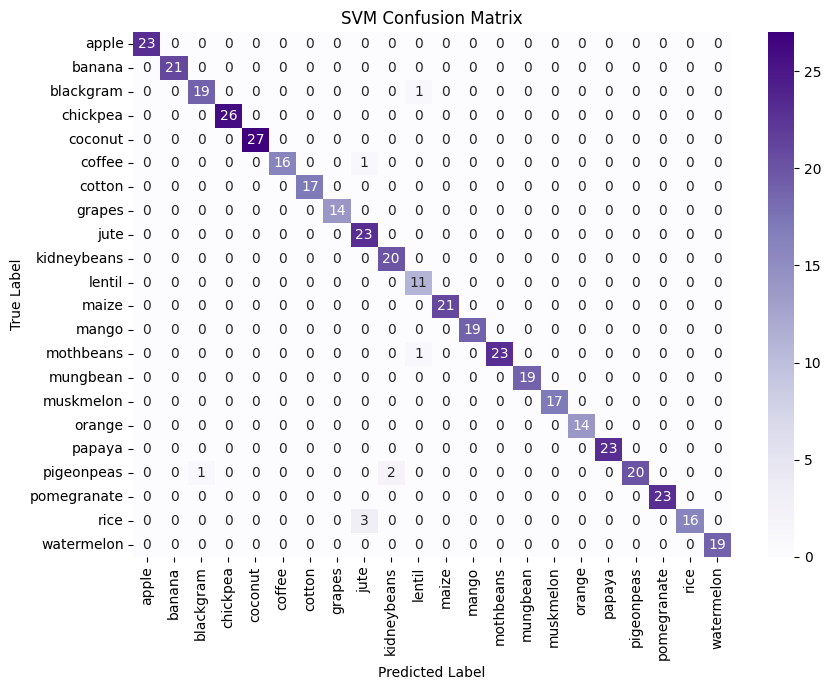

In [47]:
# Confusion Matrix Visualization
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [48]:
# K-Nearest Neighbors (KNN) Classifier
from sklearn.neighbors import KNeighborsClassifier

#  Define the hyperparameter grid for the KNN classifier
param_grid_knn = {
    'n_neighbors': [3,5,7,9,11,15],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

# Grid search for KNN
knn_clf = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [49]:
knn_clf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [50]:
print("KNN best params:", knn_clf.best_params_)
print("KNN best CV score:", knn_clf.best_score_)

KNN best params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNN best CV score: 0.9829545454545455


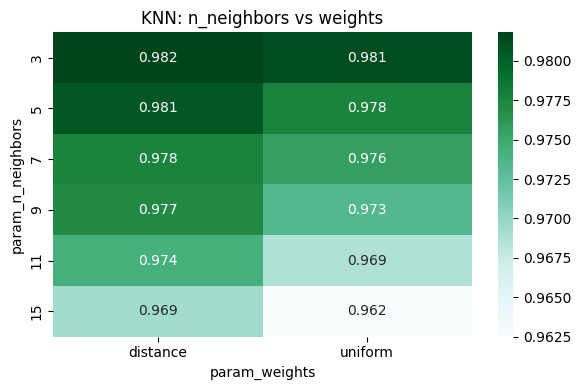

In [51]:
results_knn = pd.DataFrame(knn_clf.cv_results_)
pivot_knn = results_knn.pivot_table(values='mean_test_score', index='param_n_neighbors', columns='param_weights')
plt.figure(figsize=(6,4))
sns.heatmap(pivot_knn, annot=True, fmt=".3f", cmap='BuGn')
plt.title('KNN: n_neighbors vs weights')
plt.tight_layout()
plt.show()


In [52]:
# Evaluate on test data
y_pred_knn = knn_clf.predict(X_test)

In [53]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy (KNN):", acc_knn)

Test Accuracy (KNN): 0.975


In [54]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   

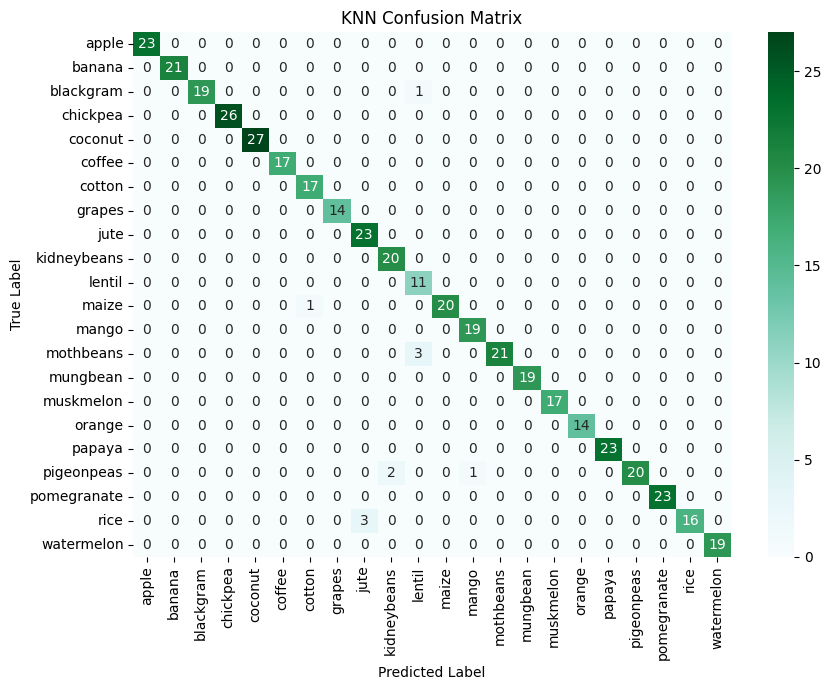

In [55]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="BuGn")
plt.title("KNN Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [56]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForest Hyperparameter Grid
rf_clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1_weighted'
)


In [57]:

rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_weighted', verbose=2)

In [58]:
# best parameter for Random forest classifier
print("Best Parameters for Random Forest:", rf_clf.best_params_)
print(f"Best Random Forest accuracy: {rf_clf.best_score_:.4f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Random Forest accuracy: 0.9954


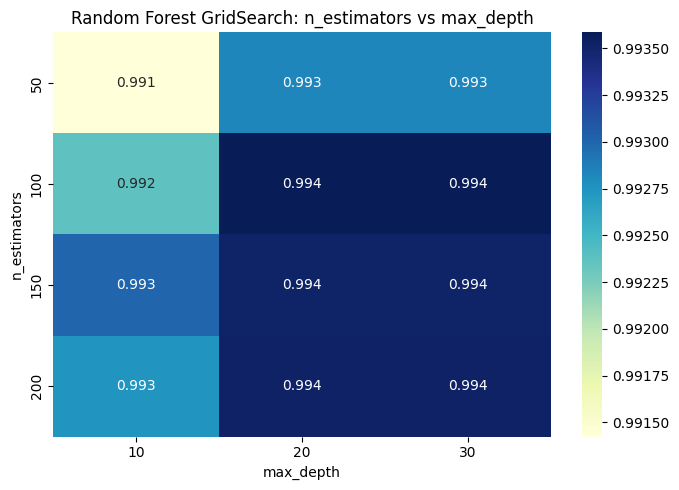

In [69]:
# Visualize cross-validated scores as a heatmap
results_rf = pd.DataFrame(rf_clf.cv_results_)
# Use correct parameters for Random Forest grid search heatmap
pivot_rf = results_rf.pivot_table(
    values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_rf, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('Random Forest GridSearch: n_estimators vs max_depth')
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.tight_layout()
plt.show()

In [60]:
# Evaluate the metrics
y_pred_rf = rf_clf.predict(X_test)

In [61]:
# Overall accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {acc_rf:.4f}")

Test Accuracy: 0.9932


In [62]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
   

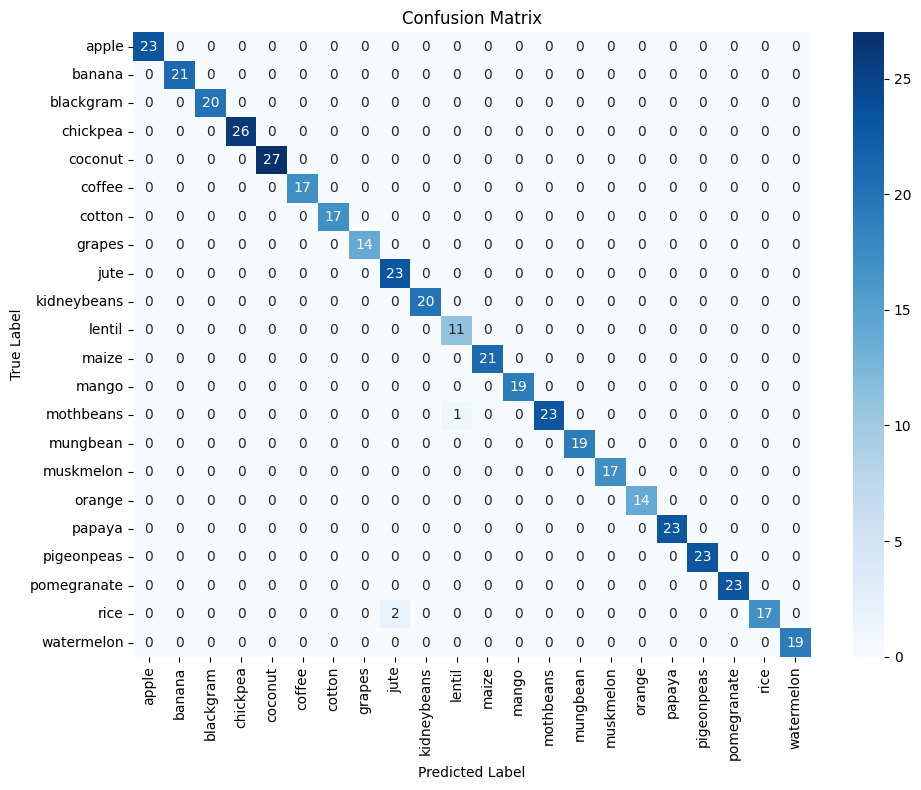

In [63]:
# Confusion matrix visualization
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#  Test Accuracy Comparison across All Models

C:\Users\SOMESH MISHRA\AppData\Local\Temp\ipykernel_8956\4145842082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=model_names, y=accuracies, palette='Set2')


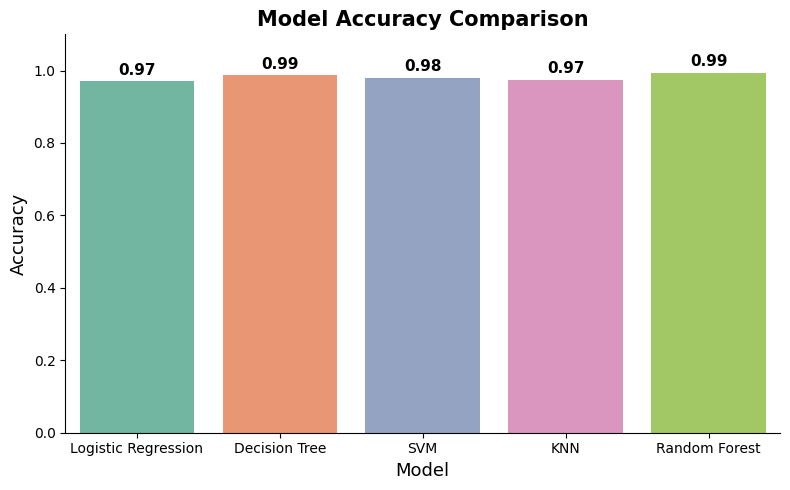

In [64]:
# Test Accuracy Comparison across All Models
model_names = [ 'Logistic Regression', 'Decision Tree', 'SVM', 'KNN','Random Forest']
accuracies = [ acc_lr, acc_dt, acc_svc, acc_knn,acc_rf]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bar = sns.barplot(x=model_names, y=accuracies, palette='Set2')

# Annotate each bar with its value
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel("Model", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Model Accuracy Comparison", fontsize=15, fontweight='bold')
plt.ylim(0, 1.10)  # Extend y-axis above 1.0 for label spacing
sns.despine()
plt.tight_layout()
plt.show()

### Selecting Best performing model

In [65]:
## final model for crop recommendation == random forest
RandomForest = RandomForestClassifier(random_state=42, n_estimators=50,max_depth=None, min_samples_leaf=1, min_samples_split=5)


In [66]:
## Train and fitting the model
RandomForest.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)

In [67]:
y_pred = RandomForest.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Final Test Accuracy: {accuracy:.4f}")

 Final Test Accuracy: 0.9909
